In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline

Best fit value A 0.00140301850446 +- 3.33173072494e-05
Best fit value B 0.0154551729169 +- 0.0196967239578


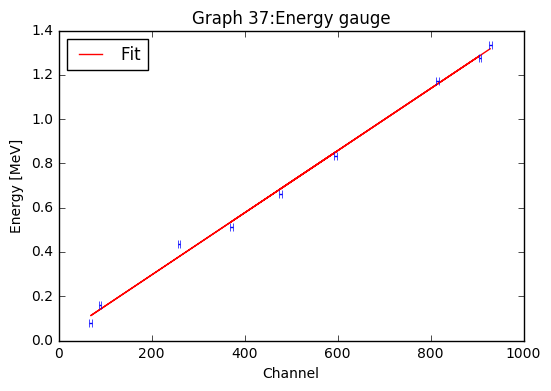

In [19]:
#Energy Gauge
Energy=np.array([1.33248,1.17323,0.6616,0.8353,0.437,0.1605,0.081,1.2746,0.511])
channel=np.array([928,814,477,596,259,89,69,906,372])
dchannel=3

def energyfit(A,x,B):
    return A*x+B

popt, pcov=curve_fit(energyfit,channel, Energy, sigma=dchannel)
plt.plot(channel, energyfit(channel,*popt), "-r", label="Fit")
plt.errorbar(channel, Energy, xerr=dchannel, fmt="none")
plt.title("Graph 37:Energy gauge")
plt.legend(loc="best")
plt.xlabel("Channel")
plt.ylabel("Energy [MeV]")
plt.savefig("Energygauge.pdf")

print("Best fit value A", popt[0], "+-", pcov[0,0]**0.5)
print("Best fit value B",popt[1], "+-", pcov[1,1]**0.5)


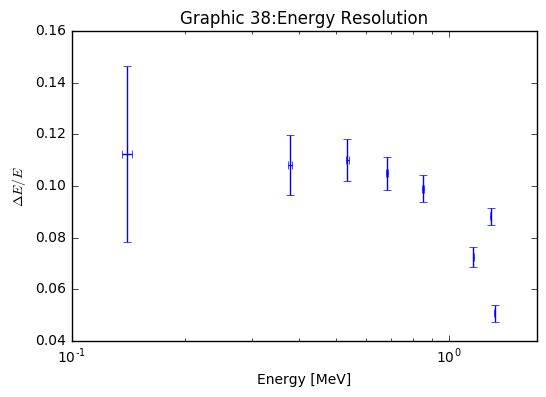

In [53]:
#Energy Resolution
Peak=np.array([814,928,477,596,259,89,372,906])
FWHM=np.array([59,47,50,59,28,10,41,80])
dFWHM=3
dPeak=3
dE=np.sqrt((popt[0]*dFWHM)**2+(pcov[0,0]*FWHM)**2+(pcov[1,1])**2)
ddE=np.sqrt((dFWHM/Peak)**2+(FWHM*dPeak/Peak**2)**2)
plt.errorbar(energyfit(popt[0], Peak, popt[1]),FWHM/Peak,xerr=dE, yerr=ddE,marker="o", fmt="none")
plt.xscale("log")
plt.title("Graphic 38:Energy Resolution")
plt.xlabel("Energy [MeV]")
plt.ylabel("$\Delta E/E$")
plt.xlim(0.1,1.7)
plt.savefig("Energyresolution.pdf")

Best fit value F 1.2079533207 +- 0.452729295055
Best fit value G 676.184934913 +- 10.1906541435


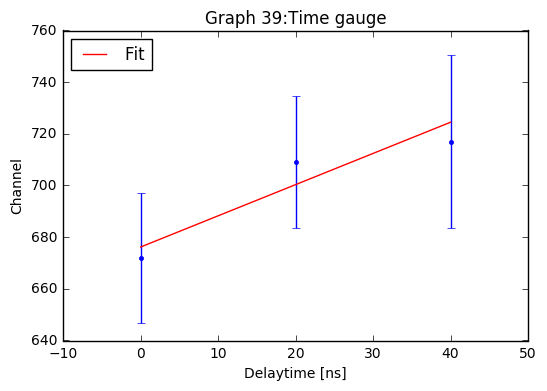

In [13]:
#Time gauge

xvalue=np.array([0,20,40])#ns
yvalue=np.array([672,709,717])
yerror=np.array([59/2.355, 60/2.355, 79/2.355])
def timefit(F,x,G):
    return F*x+G

popt, pcov=curve_fit(timefit,xvalue, yvalue, sigma=yerror)
plt.plot(xvalue, timefit(xvalue,*popt), "-r", label="Fit")
plt.errorbar(xvalue, yvalue, yerr=yerror, marker=".", linestyle="None")
plt.title("Graph 39:Time gauge")
plt.legend(loc="best")
plt.xlabel("Delaytime [ns]")
plt.ylabel("Channel")
plt.xlim(-10,50)
plt.savefig("Timegauge.pdf")


print("Best fit value F", popt[0], "+-", pcov[0,0]**0.5)
print("Best fit value G",popt[1], "+-", pcov[1,1]**0.5)


In [14]:
print(672/popt[0])

556.312887662


Best fit value K 1.47500000005 +- 0.0152348421697
Best fit value L 185.185680331 +- 0.388848488065


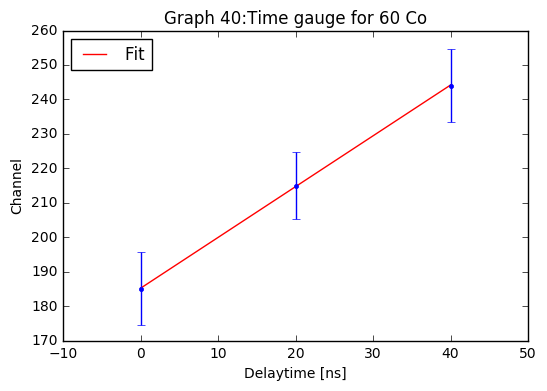

In [17]:

xvalue=np.array([0,20,40])#ns
yvalue=np.array([185,215,244])
yerror1=np.array([25/2.355, 23/2.355, 25/2.355])
def timefit1(K,x,L):
    return K*x+L

popt, pcov=curve_fit(timefit1,xvalue, yvalue, sigma=yerror1)
plt.plot(xvalue, timefit1(xvalue,*popt), "-r", label="Fit")
plt.errorbar(xvalue, yvalue, yerr=yerror1, marker=".", linestyle="None")
plt.title("Graph 40:Time gauge for 60 Co")
plt.legend(loc="best")
plt.xlabel("Delaytime [ns]")
plt.ylabel("Channel")
plt.xlim(-10,50)
plt.savefig("Timegauge1.pdf")


print("Best fit value K", popt[0], "+-", pcov[0,0]**0.5)
print("Best fit value L",popt[1], "+-", pcov[1,1]**0.5)
